<div style="background-color:#2E86C1; color:white; padding:15px; border-radius:10px; text-align:center; font-size:30px;">
📌 Network Anomaly Detection using UNSW-NB15
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unswnb15/UNSW_NB15_testing-set.parquet
/kaggle/input/unswnb15/UNSW_NB15_training-set.parquet


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()

In [3]:
df = pd.read_parquet("/kaggle/input/unswnb15/UNSW_NB15_training-set.parquet")


In [4]:
# Show all columns in Pandas dataframe
pd.set_option('display.max_columns', None)

<div style="background-color:#2E86C1; color:white; padding:15px; border-radius:10px; text-align:center; font-size:25px;">
📊 Step 1: Exploratory Data Analysis (EDA)
</div>

In [5]:
df.shape

(175341, 36)

In [6]:
df[df.label==1]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
47911,0.000009,ddp,-,INT,2,0,200,0,111111.109375,8.888889e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,1,1,0,0,0,0,Backdoor,1
47912,0.000009,ipv6-frag,-,INT,2,0,200,0,111111.109375,8.888889e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,2,2,0,0,0,0,Backdoor,1
47913,0.000009,cftp,-,INT,2,0,200,0,111111.109375,8.888889e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,1,1,0,0,0,0,Backdoor,1
47914,0.000003,wsn,-,INT,2,0,200,0,333333.312500,2.666667e+08,0.000000,0,0,0.003000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,2,2,0,0,0,0,Backdoor,1
47915,0.000008,pvp,-,INT,2,0,200,0,125000.000000,1.000000e+08,0.000000,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,1,1,0,0,0,0,Backdoor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,13,0,0,0,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,4903.492188,2,1,54.400112,66.980568,3721.068848,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,0,0,0,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,14,0,0,0,0,Generic,1


<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 1.1 Types of attack
</div>

In [7]:
df['attack_cat'].value_counts()


attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

<div style="background-color:#D6EAF8; color:#154360; padding:12px; border-radius:8px;">
📝 <b>Note:</b> There are 9 attack types. We will use One-Hot Encoding.
</div>


<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 1.2 Types of Protocol
</div>

In [8]:
df['proto'].unique()

['tcp', 'udp', 'arp', 'ospf', 'icmp', ..., 'irtp', 'iso-tp4', 'netblt', 'trunk-2', 'cbt']
Length: 133
Categories (133, object): ['3pc', 'a/n', 'aes-sp3-d', 'any', ..., 'xnet', 'xns-idp', 'xtp', 'zero']

<div style="background-color:#D6EAF8; color:#154360; padding:12px; border-radius:8px;">
📝 <b>Note:</b> There are 133 protocol types. We will use Label Encoder.
</div>


<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 1.3 Types of Service
</div>

In [9]:
df['service'].unique()

['-', 'ftp', 'smtp', 'snmp', 'http', ..., 'radius', 'pop3', 'dhcp', 'ssl', 'irc']
Length: 13
Categories (13, object): ['-', 'dhcp', 'dns', 'ftp', ..., 'smtp', 'snmp', 'ssh', 'ssl']

<div style="background-color:#D6EAF8; color:#154360; padding:12px; border-radius:8px;">
📝 <b>Note:</b> There are 13 service types. We will use One-Hot Encoder.
</div>


<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 1.4 Types of State
</div>

In [10]:
df['state'].unique()

['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no']
Categories (9, object): ['CON', 'ECO', 'FIN', 'INT', ..., 'REQ', 'RST', 'URN', 'no']

<div style="background-color:#D6EAF8; color:#154360; padding:12px; border-radius:8px;">
📝 <b>Note:</b> There are 9 state types. We will use One-Hot Encoder.
</div>


<div style="background-color:#2E86C1; color:white; padding:15px; border-radius:10px; text-align:center; font-size:25px;">
📊 Step 2: Data Pre-processing
</div>

<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 2.1 Cleaning NULL values
</div>

In [11]:
df.dropna(inplace = True)

<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 2.2 Applying One-Hot on Attack Catagory (attack_cat)
</div>

In [12]:
df = pd.get_dummies(df, columns=['attack_cat'])

In [13]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,0,False,False,False,False,False,False,True,False,False,False
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False


<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 2.3 Applying Label encoding on Protocol (proto)
</div>

In [14]:
df['proto_encoded'] = le.fit_transform(df['proto'])

In [15]:
df.drop(columns=['proto'], inplace = True)

In [16]:
df. head()

,dur,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,proto_encoded
0,0.121478,-,FIN,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113
1,0.649902,-,FIN,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113
2,1.623129,-,FIN,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113
3,1.681642,ftp,FIN,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,0,False,False,False,False,False,False,True,False,False,False,113
4,0.449454,-,FIN,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113


<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 2.4 Applying One-Hot encoding on connection state (state)
</div>

In [17]:
df = pd.get_dummies(df, columns=['state'])

In [18]:
df.head()

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,proto_encoded,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,-,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113,False,False,True,False,False,False,False,False,False
1,0.649902,-,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113,False,False,True,False,False,False,False,False,False
2,1.623129,-,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113,False,False,True,False,False,False,False,False,False
3,1.681642,ftp,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,0,False,False,False,False,False,False,True,False,False,False,113,False,False,True,False,False,False,False,False,False
4,0.449454,-,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,113,False,False,True,False,False,False,False,False,False


<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 2.4 Applying Standard Standard Scaler on all numeric columns
</div>

In [19]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [20]:
df.head()

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,proto_encoded,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,-,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,-0.256392,0.911123,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,0.151809,False,False,True,False,False,False,False,False,False
1,0.649902,-,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,0.331031,1.557251,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,0.151809,False,False,True,False,False,False,False,False,False
2,1.623129,-,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,0.846258,1.472854,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,0.151809,False,False,True,False,False,False,False,False,False
3,1.681642,ftp,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,0.101729,0.058025,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,0,False,False,False,False,False,False,True,False,False,False,0.151809,False,False,True,False,False,False,False,False,False
4,0.449454,-,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,1.082366,0.744668,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,0.151809,False,False,True,False,False,False,False,False,False


<div style="background-color:#2E86C1; color:white; padding:15px; border-radius:10px; text-align:center; font-size:25px;">
📊 Step 3: Model Training and Accuracy
</div>

<div style="background-color:#FFD700; color:BLACK; padding:5px; border-radius:10px; text-align:left; font-size:25px;">
📊 3.1 Classical ML
</div>

<div style="background-color:#D6EAF8; color:#154360; padding:12px; border-radius:8px;">
📝 <b>ML Algos used on this section:</b> LogisticRegression, LinearSVC_calibrated, DecisionTree, RandomForest, XGBoost, KNN
</div>

Using target: label
After cleanup, shape: (175341, 53)
Categorical cols: ['service']
Numeric cols sample: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload'] ... (total 32)
Train shape: (140272, 52) Test shape: (35069, 52)
Processed train shape: (140272, 45)

--- MODEL: LogisticRegression
Acc: 0.8946  Prec(macro): 0.9099  Recall(macro): 0.8472  F1(macro): 0.8697
FPR (macro): 0.1528  AUC(macro-ovr): N/A

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     11200
           1       0.88      0.98      0.93     23869

    accuracy                           0.89     35069
   macro avg       0.91      0.85      0.87     35069
weighted avg       0.90      0.89      0.89     35069



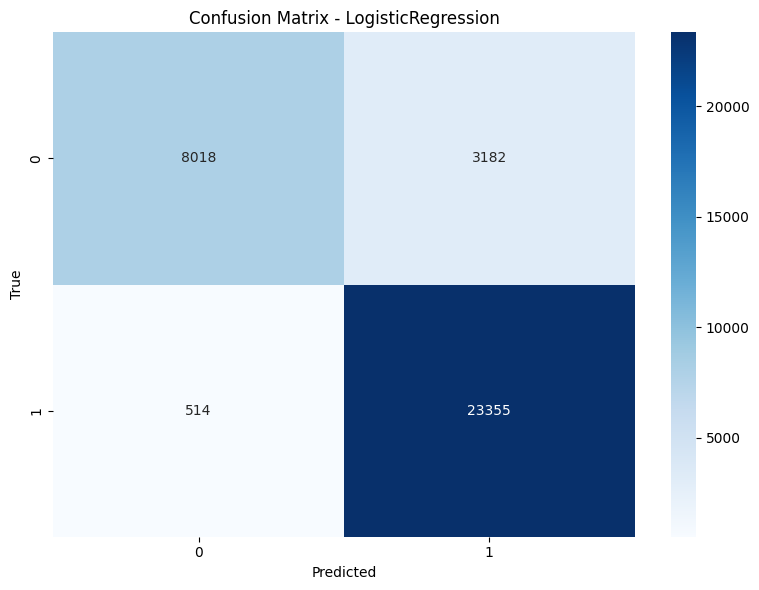


--- MODEL: LinearSVC_calibrated
Acc: 0.7636  Prec(macro): 0.8696  Recall(macro): 0.6301  F1(macro): 0.6326
FPR (macro): 0.3699  AUC(macro-ovr): N/A

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.26      0.41     11200
           1       0.74      1.00      0.85     23869

    accuracy                           0.76     35069
   macro avg       0.87      0.63      0.63     35069
weighted avg       0.82      0.76      0.71     35069



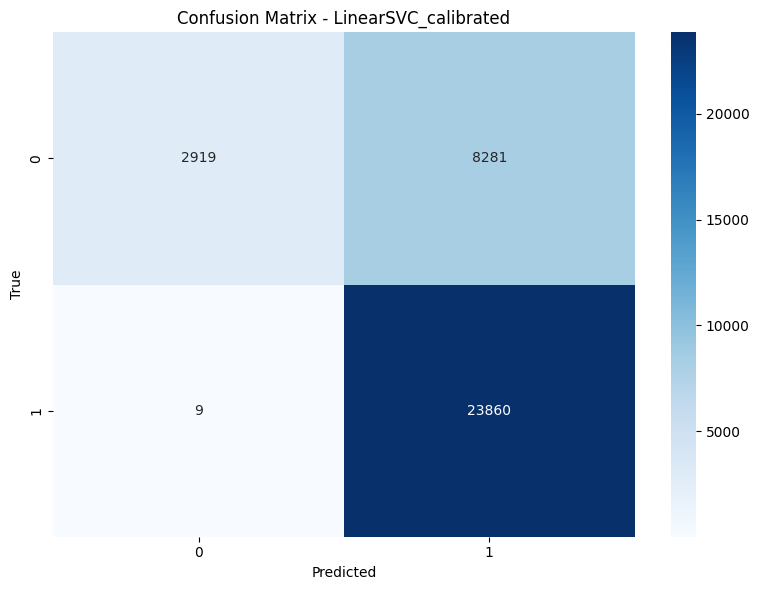


--- MODEL: DecisionTree
Acc: 0.9406  Prec(macro): 0.9319  Recall(macro): 0.9314  F1(macro): 0.9316
FPR (macro): 0.0686  AUC(macro-ovr): N/A

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     11200
           1       0.96      0.96      0.96     23869

    accuracy                           0.94     35069
   macro avg       0.93      0.93      0.93     35069
weighted avg       0.94      0.94      0.94     35069



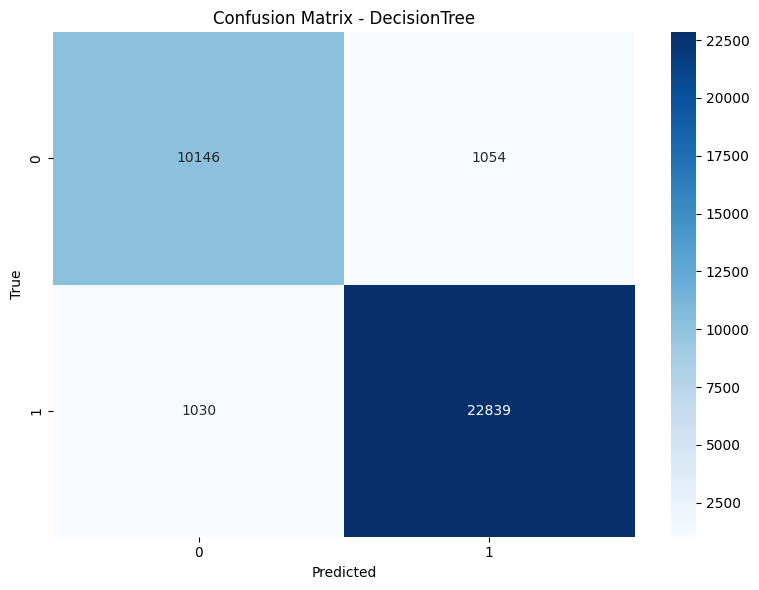


--- MODEL: RandomForest
Acc: 0.9517  Prec(macro): 0.9496  Recall(macro): 0.9384  F1(macro): 0.9437
FPR (macro): 0.0616  AUC(macro-ovr): N/A

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     11200
           1       0.95      0.98      0.96     23869

    accuracy                           0.95     35069
   macro avg       0.95      0.94      0.94     35069
weighted avg       0.95      0.95      0.95     35069



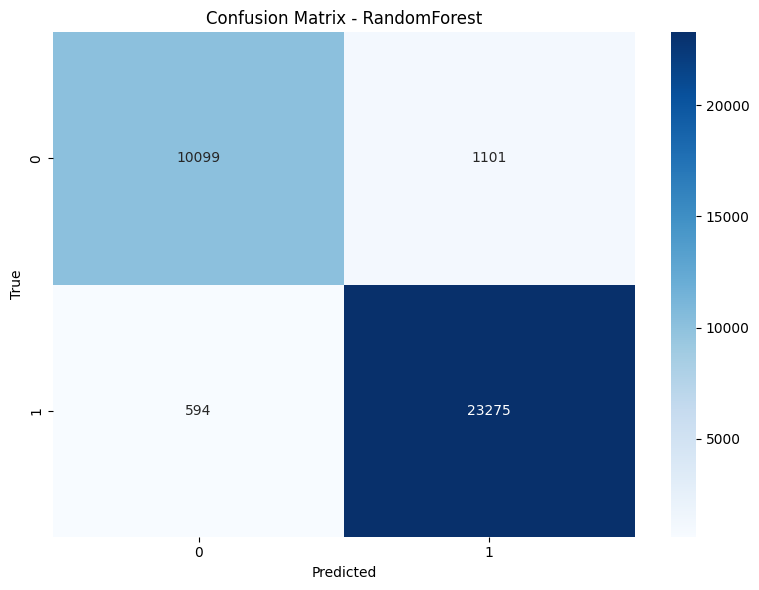


--- MODEL: XGBoost
Acc: 0.9506  Prec(macro): 0.9477  Recall(macro): 0.9378  F1(macro): 0.9425
FPR (macro): 0.0622  AUC(macro-ovr): N/A

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     11200
           1       0.96      0.97      0.96     23869

    accuracy                           0.95     35069
   macro avg       0.95      0.94      0.94     35069
weighted avg       0.95      0.95      0.95     35069



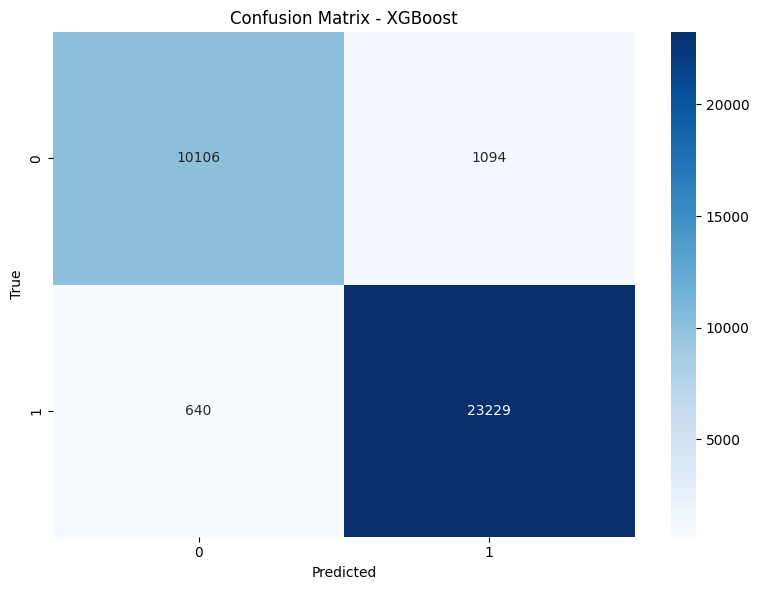


--- MODEL: KNN
Acc: 0.9281  Prec(macro): 0.9235  Recall(macro): 0.9094  F1(macro): 0.9159
FPR (macro): 0.0906  AUC(macro-ovr): N/A

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     11200
           1       0.93      0.96      0.95     23869

    accuracy                           0.93     35069
   macro avg       0.92      0.91      0.92     35069
weighted avg       0.93      0.93      0.93     35069



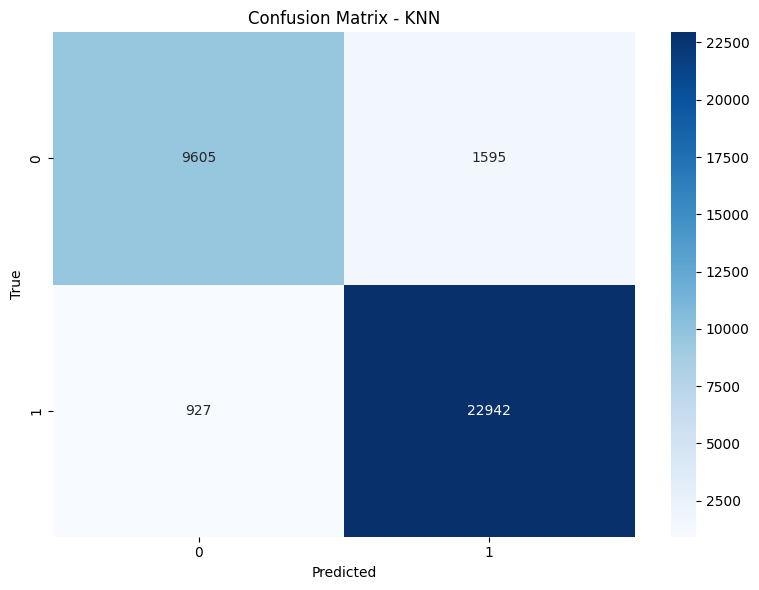

,accuracy,precision_macro,recall_macro,f1_macro,fpr_macro,auc_macro_ovr
model,,,,,,
LogisticRegression,0.8946,0.9099,0.8472,0.8697,0.1528,nan
LinearSVC_calibrated,0.7636,0.8696,0.6301,0.6326,0.3699,nan
DecisionTree,0.9406,0.9319,0.9314,0.9316,0.0686,nan
RandomForest,0.9517,0.9496,0.9384,0.9437,0.0616,nan
XGBoost,0.9506,0.9477,0.9378,0.9425,0.0622,nan
KNN,0.9281,0.9235,0.9094,0.9159,0.0906,nan


Saved summary & confusion matrix images to: /kaggle/working/model_outputs


In [21]:
# Multi-model training + evaluation (LogReg, LinearSVC, DT, RF, XGBoost, KNN)
# Paste into Kaggle/Jupyter after loading df (UNSW_NB15). Requires: scikit-learn, xgboost, imbalanced-learn optional
# Installs (if needed): !pip install xgboost

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, classification_report)

# -------------------------
# 0) User checks / load df
# -------------------------
# Make sure df is already loaded e.g. df = pd.read_csv("UNSW_NB15.csv")
assert 'df' in globals() or 'df' in locals(), "Load the dataset into a variable named `df` before running."

# Choose target
target_col = 'attack_cat' if 'attack_cat' in df.columns else 'label'
print("Using target:", target_col)

# Drop identifier columns commonly not used
drop_cols = [c for c in ['srcip', 'dstip', 'id'] if c in df.columns]
if drop_cols:
    df = df.drop(columns=drop_cols)
    print("Dropped identifiers:", drop_cols)

# Basic cleanup (replace inf and drop rows with NaN)
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
print("After cleanup, shape:", df.shape)

# Features & target
X = df.drop(columns=[target_col])
y = df[target_col].copy()

# Optionally override categorical columns if autodetect is not satisfactory
categorical_cols_override = None  # e.g. ['proto','service','state'] or None to autodetect

if categorical_cols_override:
    cat_cols = [c for c in categorical_cols_override if c in X.columns]
else:
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical cols:", cat_cols)
print("Numeric cols sample:", num_cols[:8], "... (total {})".format(len(num_cols)))

# -------------------------
# 1) Train/test split (stratified)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# -------------------------
# 2) Preprocessing: OneHot for categorical (sparse), StandardScaler for numerics
# -------------------------
# For memory safety, use sparse OHE. Some models accept sparse input (sklearn generally does).
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=True), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop',
    sparse_threshold=0.3  # keep sparse if many cat features
)

# Fit preprocessor and transform
preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

print("Processed train shape:", getattr(X_train_proc, "shape", None))

# -------------------------
# 3) Model definitions
# -------------------------
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1),
    # LinearSVC does not provide prob by default -> calibrate to get probabilities for AUC
    'LinearSVC_calibrated': CalibratedClassifierCV(LinearSVC(max_iter=5000), cv=3),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

# -------------------------
# 4) Helper: compute macro FPR from confusion matrix
# -------------------------
def macro_fpr_from_cm(cm):
    # cm shape (n_classes, n_classes) with order consistent with lb.classes_
    per_class_fpr = []
    total = cm.sum()
    for i in range(cm.shape[0]):
        TP = cm[i,i]
        FN = cm[i,:].sum() - TP
        FP = cm[:,i].sum() - TP
        TN = total - (TP + FP + FN)
        denom = FP + TN
        fpr = FP / denom if denom > 0 else 0.0
        per_class_fpr.append(fpr)
    return np.mean(per_class_fpr), per_class_fpr

# -------------------------
# 5) Train / evaluate loop
# -------------------------
results = []
out_dir = Path('model_outputs'); out_dir.mkdir(exist_ok=True)

# For AUC need binarized y
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)  # shape (n_samples, n_classes) or (n_samples,) if binary

for name, clf in models.items():
    print("\n--- MODEL:", name)
    # Fit
    clf.fit(X_train_proc, y_train)
    # Predict labels
    y_pred = clf.predict(X_test_proc)
    # Get scores for AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test_proc)
    elif hasattr(clf, "decision_function"):
        try:
            df_dec = clf.decision_function(X_test_proc)
            # scale/reshape to (n_samples, n_classes) if needed
            y_score = df_dec
        except Exception:
            y_score = None
    else:
        y_score = None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)   # detection rate (macro)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Confusion matrix (order by lb.classes_)
    classes = lb.classes_
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    fpr_macro, per_class_fpr = macro_fpr_from_cm(cm)

    # AUC macro OVR if scores exist
    if y_score is not None:
        try:
            auc_macro = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
        except Exception:
            auc_macro = np.nan
    else:
        auc_macro = np.nan

    # Print summary
    print(f"Acc: {acc:.4f}  Prec(macro): {prec_macro:.4f}  Recall(macro): {rec_macro:.4f}  F1(macro): {f1_macro:.4f}")
    print(f"FPR (macro): {fpr_macro:.4f}  AUC(macro-ovr): {auc_macro if not np.isnan(auc_macro) else 'N/A'}")

    # Detailed classification report
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Save confusion matrix figure
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    fname = out_dir / f"confusion_{name}.png"
    plt.savefig(fname, dpi=200)
    plt.show()

    # Append to results
    results.append({
        'model': name,
        'accuracy': acc,
        'precision_macro': prec_macro,
        'recall_macro': rec_macro,
        'f1_macro': f1_macro,
        'fpr_macro': fpr_macro,
        'auc_macro_ovr': auc_macro
    })

# -------------------------
# 6) Results DataFrame & save
# -------------------------
res_df = pd.DataFrame(results).set_index('model')
display(res_df.style.format({
    'accuracy':'{:.4f}','precision_macro':'{:.4f}','recall_macro':'{:.4f}',
    'f1_macro':'{:.4f}','fpr_macro':'{:.4f}','auc_macro_ovr':'{:.4f}'
}))
res_df.to_csv(out_dir / 'model_metrics_summary.csv')
print("Saved summary & confusion matrix images to:", out_dir.resolve())
